# App param scan beta dist figure

Changing `b` and `mu`

In [1]:
%load_ext autoreload
%autoreload 2

# %matplotlib widget

In [2]:
import pandas as pd

import seaborn as sns

from math import log, floor

import numpy as np
import matplotlib.pyplot as plt

import itertools


from plots2.fns import (
    get_corner_annotations,
    # get_corner_annotations_custom_labels,
    # get_corner_annotations_explicit
)

from plots2.consts import (
    SMALL_FONT,
    MEDIUM_FONT,
    BIGGER_FONT,
    SHAP_BLUE
)

from poly2.utils import trait_vec, beta_dist
# from poly2.config import Config, ConfigMixture, get_asymptote_config

C:\Users\user\anaconda3\envs\poly2\lib\site-packages\scipy\stats\_continuous_distns.py:615: RuntimeWarning: divide by zero encountered in _beta_cdf
  return _boost._beta_cdf(x, a, b)


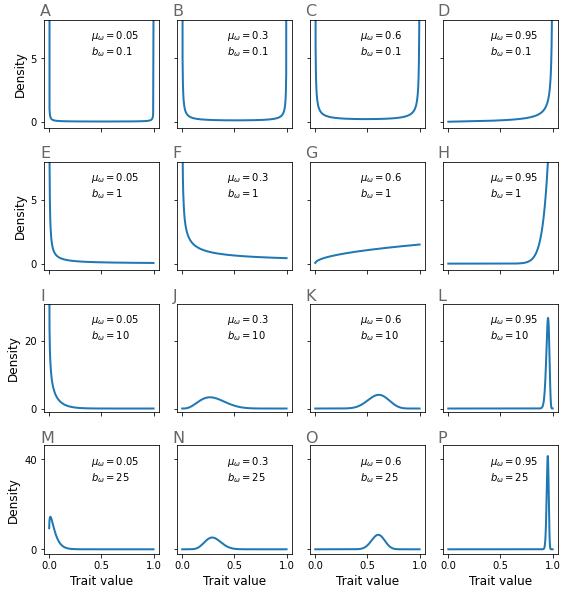

In [16]:
f, ax = plt.subplots(
    4,
    4, 
    figsize=(8,9)
)

plt.rc('font', size=SMALL_FONT)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_FONT)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_FONT)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_FONT)    # legend fontsize

tv = trait_vec(300)

bs = [0.1, 1, 10, 25]
mus = [0.05, 0.3, 0.6, 0.95]

for ii, (mu, b) in enumerate(itertools.product(mus, bs)):
    
    cc = floor(ii/4)
    rr = ii%4

    a = (b*mu)/(1-mu)
    yy = beta_dist(300, a, b)
    
    yy = yy/np.sum(yy)
    
    yy = yy / (tv[1] - tv[0])
    
    ax[rr][cc].plot(tv, yy, lw=2, label=r'$\mu_{\omega}=$' + f'{mu}' + '\n' + r'$b_{\omega}=$' + f'{b}')
    ax[rr][cc].set_ylim([-5, 310])

f.patch.set_facecolor('white')

ax[3][0].set_xlabel('Trait value')
ax[3][1].set_xlabel('Trait value')
ax[3][2].set_xlabel('Trait value')
ax[3][3].set_xlabel('Trait value')

ax[0][0].set_ylabel('Density')
ax[1][0].set_ylabel('Density')
ax[2][0].set_ylabel('Density')
ax[3][0].set_ylabel('Density')




    
for ii, jj in itertools.product(range(4), range(4)):
    # if ii==0 and jj==2:
    #     pass
    # else:
    legend = ax[ii][jj].legend(frameon=False, loc='upper center')
    
    for label in legend.get_lines(): 
        label.set_linewidth(0.0)
    
    
    if ii<2:
        ax[ii][jj].set_yticks([0, 5])
        ax[ii][jj].set_ylim([-0.5, 8])
    elif ii==2:
        ax[ii][jj].set_yticks([0, 20])
        ax[ii][jj].set_ylim([-1, 31])
    else:
        ax[ii][jj].set_yticks([0, 40])
        ax[ii][jj].set_ylim([-2, 46])
    
    if ii<3:
        ax[ii][jj].set_xticklabels([])
    
    if jj>0:
        ax[ii][jj].set_yticklabels([])
        



plt.tight_layout(rect=[0,0,1,0.91], h_pad=3)

get_corner_annotations(4, 4, 0.07, 0.895, 0.23, 0.22, plt)

# f

## Save

In [17]:
f.savefig('../figures/paper/app6_fig1.jpg', dpi=1200, bbox_inches="tight")